# Import Library and Check Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df.shape

(2240, 30)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- Dataset terdiri dari 30 fitur dan 2240 baris
- Missing value terdapat pada fitur Income
- Tidak ada data yang duplikat

# Data Cleaning

In [ ]:
df1 = df.copy()

## Handling Outlier

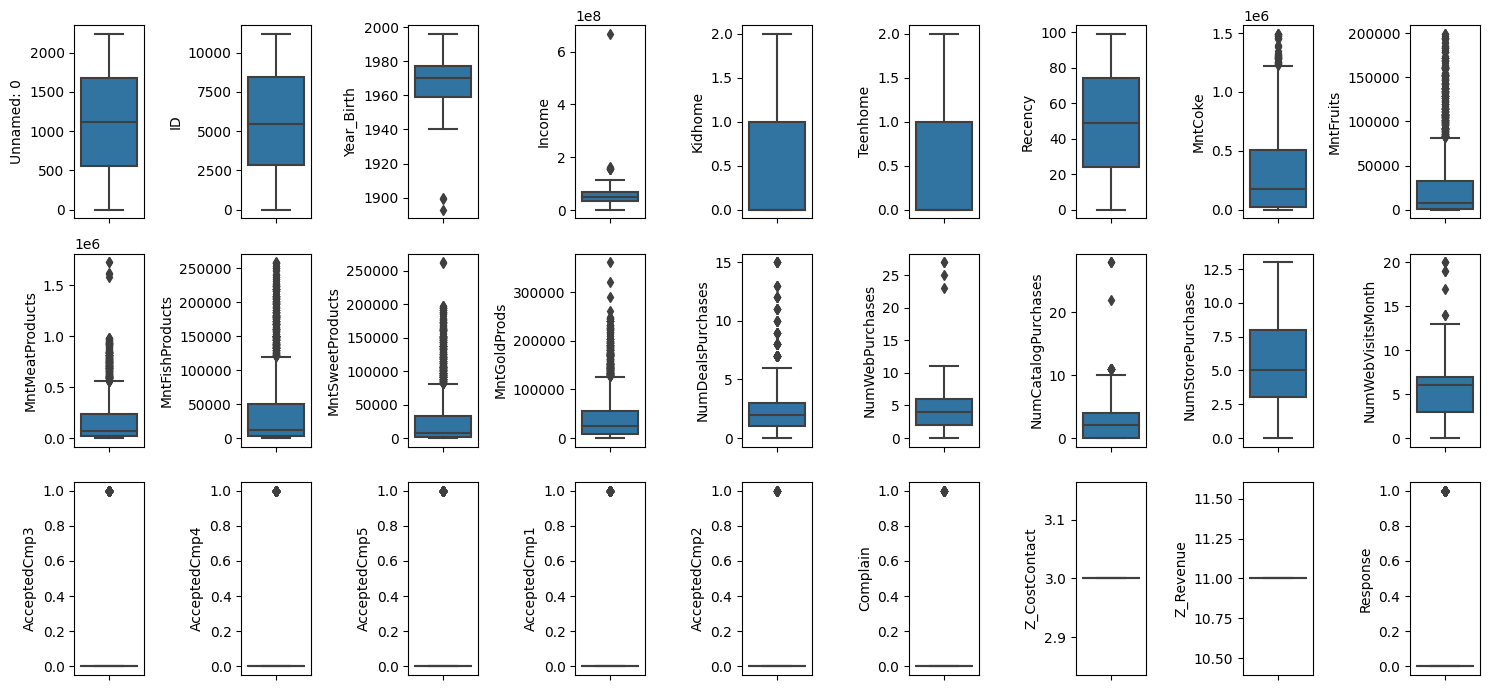

In [ ]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Secara keseluruhan data cenderung memiliki outlier. Terlihat nilai ekstrim pada fitur **Income** dan **Year_Birth**

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries

df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 1840


Hasil setelah dilakukan handling outlier

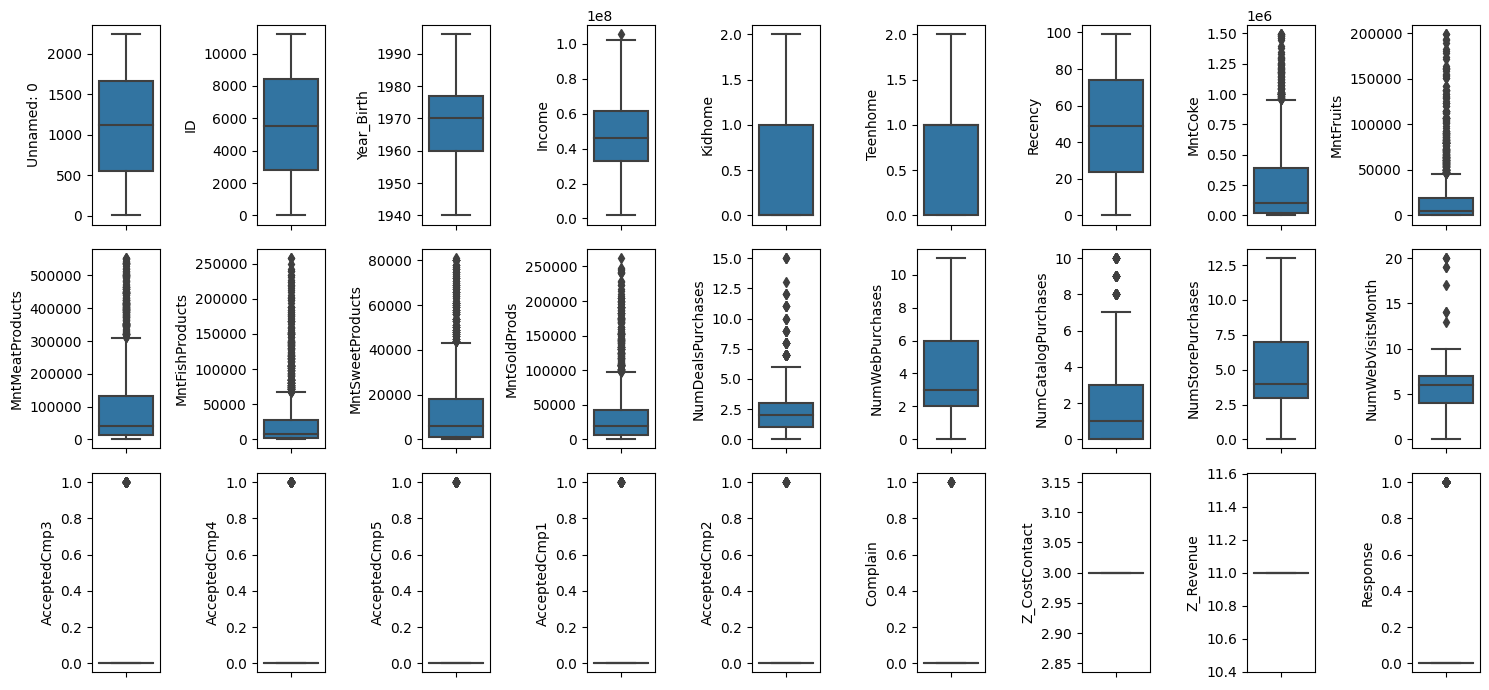

In [ ]:
nums = df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns.tolist()
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df1[nums[i]], orient='v')
    plt.tight_layout()

## Handling Missing Value

Handling missing value dilakukan dengan imputasi nilai median (robust)

In [ ]:
df1.fillna(df1['Income'].median(), inplace=True)

In [ ]:
df1.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Feature Engineering

In [ ]:
# conversion to datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

# create membership duration column
# ------------------------------------------------------------
df1['Membership_Duration'] = 2023 - df1['Dt_Customer'].dt.year

In [ ]:
df1['Membership_Duration'].value_counts()

10    975
9     471
11    394
Name: Membership_Duration, dtype: int64

In [ ]:
# create age column
df1['Age'] = 2023 - df1['Year_Birth']

In [ ]:
# create age group column
df1['Age_Categories'] = np.where(df1['Age'] < 40, 'Young Adult',
                      np.where(df1['Age'] < 60, 'Middle-Aged Adult',
                               'Old Adult'))

In [ ]:
df1['Age_Categories'].value_counts()

Middle-Aged Adult    1038
Old Adult             597
Young Adult           205
Name: Age_Categories, dtype: int64

In [ ]:
# create total children column
df1['Total_Children'] = df1['Kidhome'] + df1['Teenhome']

In [ ]:
df1['Total_Children'].value_counts()

1    1027
2     405
0     359
3      49
Name: Total_Children, dtype: int64

In [ ]:
# create total transaction column
df1['Total_Transaction'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

In [ ]:
# create total spending column
df1['Total_Spending'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts']

In [ ]:
# create total accepted campaigns column
# Total accepted campaigns
df1['Total_Accepted_Campaigns'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']

In [ ]:
# Conversion rate
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df1['Conversion_Rate'] = round(df1.apply(lambda x: cvr(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1), 2)

In [ ]:
df1.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Z_Revenue,Response,Membership_Duration,Age,Age_Categories,Total_Children,Total_Transaction,Total_Spending,Total_Accepted_Campaigns,Conversion_Rate
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,...,11,0,9,69,Old Adult,2,6,21000,0,1.20
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,11,0,10,58,Middle-Aged Adult,0,21,734000,0,5.25
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,...,11,0,9,39,Young Adult,1,8,48000,0,1.33
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,11,0,9,42,Middle-Aged Adult,1,19,407000,0,3.80
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,2013-09-09,16,...,11,0,10,56,Middle-Aged Adult,1,22,702000,0,3.67


# Exploratory Data Analysis

In [ ]:
df2 = df1.copy()

In [ ]:
# numerical feature
nums = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaigns', 'Conversion_Rate']

In [ ]:
# categorical fearure
cats = df2.loc[:, (df2.dtypes == 'object')].columns.tolist()
print(cats)

['Education', 'Marital_Status', 'Age_Categories']


## Descriptive Analysis

In [ ]:
df2[nums].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,1840.0,46945913.59,18665446.62,1730000.0,32892000.00,46014500.0,61297250.0,105471000.0
Recency,1840.0,48.55,28.91,0.0,24.00,49.0,74.0,99.0
Membership_Duration,1840.0,9.96,0.68,9.0,9.00,10.0,10.0,11.0
Age,1840.0,53.98,11.48,27.0,46.00,53.0,63.0,83.0
Total_Children,1840.0,1.08,0.72,0.0,1.00,1.0,1.0,3.0
Total_Transaction,1840.0,13.58,7.42,0.0,7.00,12.0,20.0,35.0
Total_Spending,1840.0,405127.72,454528.15,4000.0,44000.00,216000.0,699250.0,2188000.0
Total_Accepted_Campaigns,1840.0,0.23,0.57,0.0,0.00,0.0,0.0,4.0
Conversion_Rate,1840.0,3.29,3.66,0.0,1.12,2.0,4.0,27.0


- Rata-rata pelanggan telah menjadi member selama 10 tahun
- Rata-rata pelanggan hanya memiliki satu anak
- Rata-rata pelanggan melakukan 13-14 transaksi
- Rata-rata pelanggan berbelanja mengeluarkan biaya Rp.405.127
- Mayoritas pelanggan tidak menerima campaign
- Konversi kunjungan web dengan pembelian mayoritas pelanggan hanya sebesar 3.29%

In [ ]:
df2[cats].describe().T

,count,unique,top,freq
Education,1840,5,S1,904
Marital_Status,1840,6,Menikah,718
Age_Categories,1840,3,Middle-Aged Adult,1038


Mayoritas pelanggan berasal dari latar pendidikan S1, telah menikah, dan Middle-Aged Adult

## Univariate Analysis

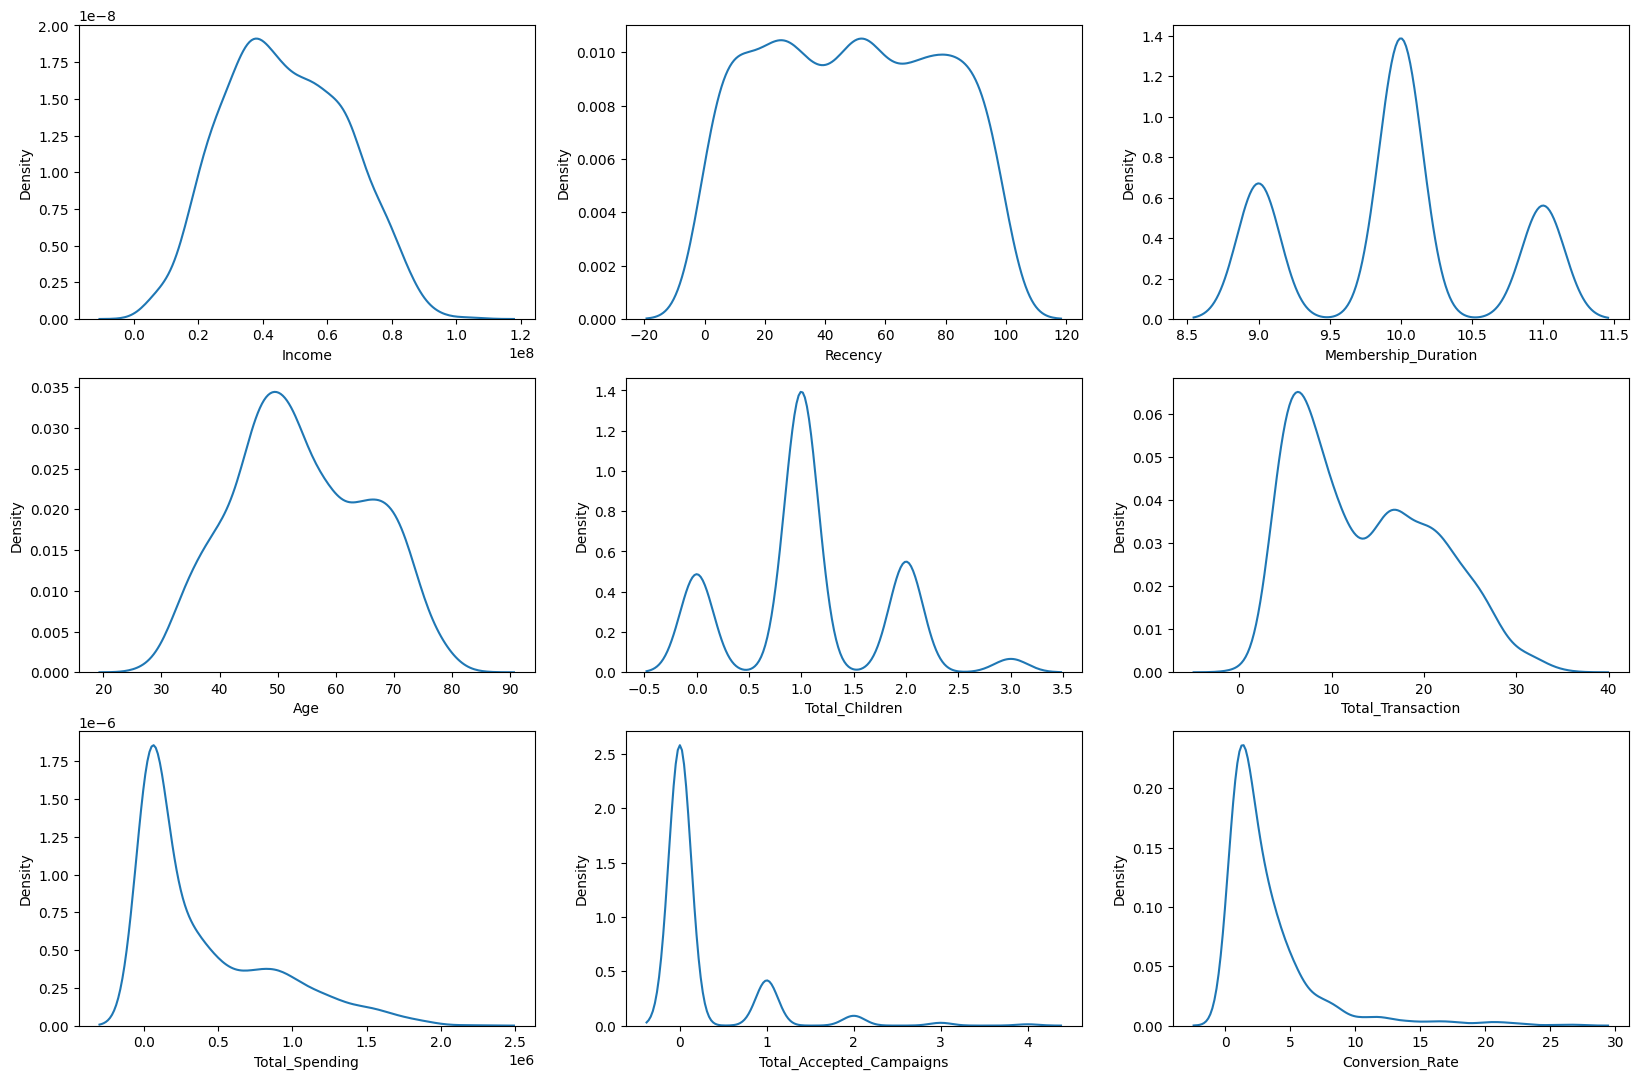

In [ ]:
# cek distribusi fitur numerikal
plt.figure(figsize = (20, 13))
for i in range(len(nums)):
  plt.subplot(3, 3, i+1)
  sns.kdeplot(data = df2, x = nums[i])

- Distribusi fitur Income, Age, dan Recency cenderung mendekati distribusi normal
- Distribusi Total_Transaction, Total_Spending dan CVR mederung positively skewed

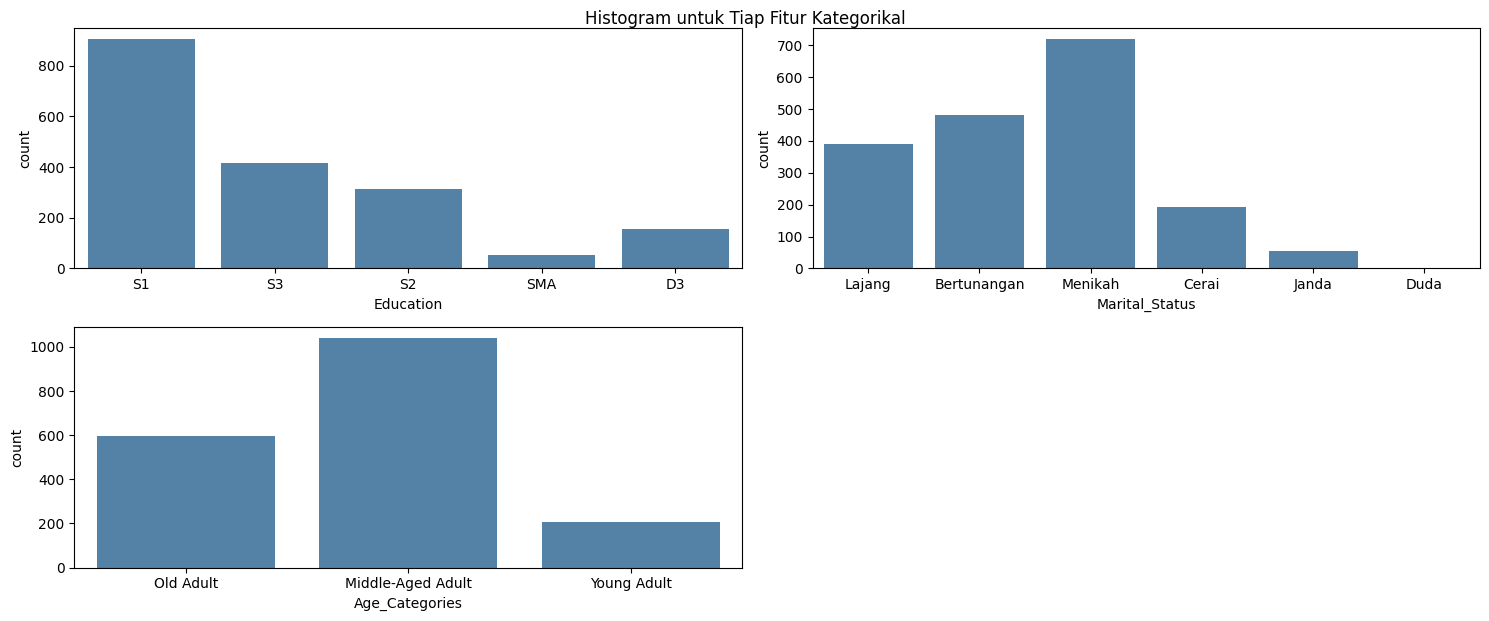

In [ ]:
# Create histplot for categorical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Histogram untuk Tiap Fitur Kategorikal')
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df2[cats[i]], color='steelblue')
    plt.tight_layout()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 1 to 2239
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1840 non-null   int64         
 1   ID                        1840 non-null   int64         
 2   Year_Birth                1840 non-null   int64         
 3   Education                 1840 non-null   object        
 4   Marital_Status            1840 non-null   object        
 5   Income                    1840 non-null   float64       
 6   Kidhome                   1840 non-null   int64         
 7   Teenhome                  1840 non-null   int64         
 8   Dt_Customer               1840 non-null   datetime64[ns]
 9   Recency                   1840 non-null   int64         
 10  MntCoke                   1840 non-null   int64         
 11  MntFruits                 1840 non-null   int64         
 12  MntMeatProducts     

## Bivariate Analysis

**Conversion Rate vs Income, Spending, and Age**

Pada tahap ini akan dilakukan analisis mengenai hubungan Conversion Rate dengan income, total spending, dan usia pelanggan.

In [ ]:
variable = ['Income', 'Total_Spending', 'Age']

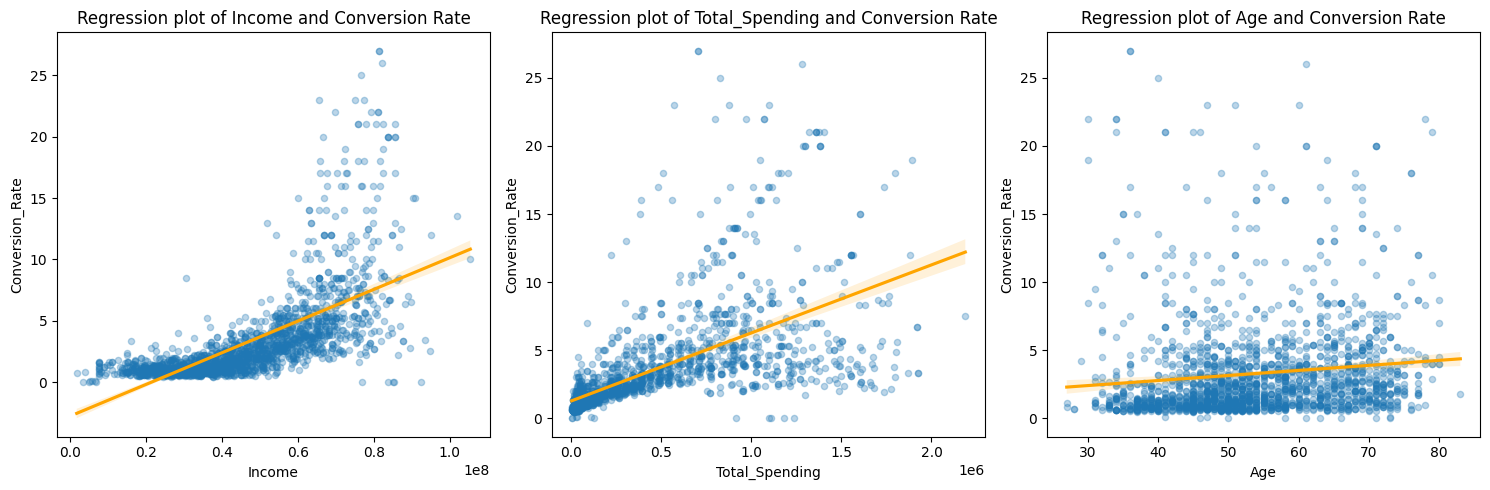

In [ ]:
plt.figure(figsize=(15, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 3, var+1)
    sns.regplot(x=df2[variable[var]], y='Conversion_Rate', data=df2, scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
    plt.tight_layout()

- Terlihat adanya korelasi positif antara Conversion Rate khususnya dengan Income dan Total Spending.
- Semakin tinggi Pendapatan dan Total Spending pelanggan, maka Conversion Rate juga semakin tinggi. Income dan Total Spending menunjukkan kapasitas keuangan pelanggan, pelanggan dengan kapasitas keuangan yang lebih tinggi memiliki Conversion Rate yang lebih tinggi.
- Usia tidak menunjukkan korelasi yang tinggi denganConversion Rate. Conversion Rate terdistribusi dengan baik pada setiap umur, hal ini menunjukkan bahwa umur tidak berpengaruh signifikan terhadap Conversion Rate pelanggan.

# Data Pre-Processing

In [ ]:
df_pre = df2.copy()

## Feature Encoding

Melakukan feature encoding pada kolom `Education`<br>
- SMA = 0
- D3 = 1
- S1 = 2
- S2 = 3
- S3 = 4




In [ ]:
# education
mapping_education = {'SMA' : 0,
                     'D3' : 1,
                     'S1' : 2,
                     'S2' : 3,
                     'S3' : 4}

df_pre['education_encd'] = df_pre['Education'].map(mapping_education)

## Standarization

In [ ]:
df_st = df_pre.copy()

In [ ]:
df_stf = df_st.drop(columns=['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Age_Categories', 'Dt_Customer'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_stf = pd.DataFrame(scaler.fit_transform(df_stf), columns=df_stf.columns)

In [ ]:
df_stf.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_Revenue,Response,Membership_Duration,Age,Total_Children,Total_Transaction,Total_Spending,Total_Accepted_Campaigns,Conversion_Rate,education_encd
0,-0.032256,0.876749,0.809803,-0.365148,-0.760019,-0.550891,-0.733803,-0.552627,-0.679909,-0.666071,...,0.0,-0.377964,-1.400057,1.308689,1.283647,-1.021472,-0.845343,-0.401435,-0.570350,-0.469878
1,1.321897,-0.950225,-1.022962,-0.780333,0.551282,1.078317,0.235689,2.018054,0.421110,0.119971,...,0.0,-0.377964,0.061148,0.349991,-1.501624,1.000954,0.723743,-0.401435,0.536465,-0.469878
2,-1.087862,0.876749,-1.022962,-0.780333,-0.760019,-0.449065,-0.621630,-0.363953,-0.569807,-0.687905,...,0.0,-0.377964,-1.400057,-1.305942,-0.108989,-0.751815,-0.785924,-0.401435,-0.534823,-0.469878
3,0.608085,0.876749,-1.022962,1.572381,-0.248138,0.874666,0.163578,0.485079,0.751416,-0.469560,...,0.0,-0.377964,-1.400057,-1.044479,-0.108989,0.731298,0.004120,-0.401435,0.140198,1.488391
4,0.834232,-0.950225,0.809803,-1.126321,0.848300,0.840724,0.003331,-0.599796,1.577180,-0.491395,...,0.0,-0.377964,0.061148,0.175682,-0.108989,1.135783,0.653321,-0.401435,0.104671,0.509256


# Data Modeling

In [ ]:
df_model = df_stf.copy()

## PCA



PCA dilakukan untuk mengurangi dimensi data dengan mempertahankan informasi yang signifikan.

In [ ]:
from sklearn.decomposition import PCA

# instantiate PCA model with 2 components
pca = PCA(n_components=2)

# fit and transform the scaled data
pca_transformed = pca.fit_transform(df_model)

In [ ]:
df_pca = pd.DataFrame(pca_transformed)

## Find Best Cluster using Elbow Method

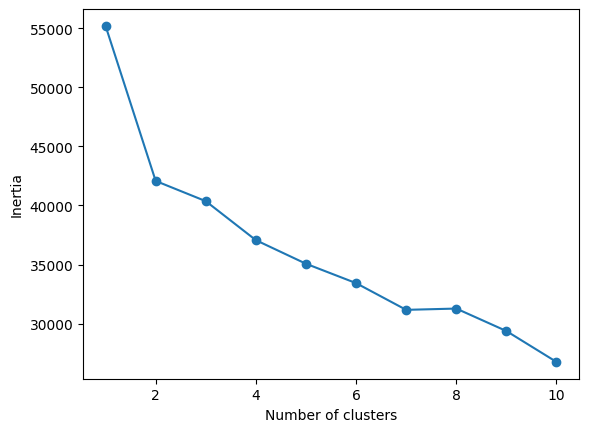

In [ ]:
from sklearn.cluster import KMeans

# create an empty list to store the inertia values
inertia = []

# create a range of k values to test
k_range = range(1, 11)

# fit KMeans for each k value and append the inertia to the list
for k in k_range:
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(df_model)
    inertia.append(model.inertia_)

# plot the inertia values against k values
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## K-Means Clustering

In [ ]:
# instantiate the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=4, random_state = 42, n_init='auto')

# fit the model to the scaled data
kmeans.fit(df_pca)

# create a new column in the dataframe for the cluster labels
df_pca['cluster'] = kmeans.labels_

In [ ]:
df_pca.head()

,0,1,cluster
0,-2.680427,0.271964,1
1,3.068019,-1.880382,2
2,-2.722523,-1.221621,1
3,0.703125,-0.557369,0
4,2.199623,0.265539,0


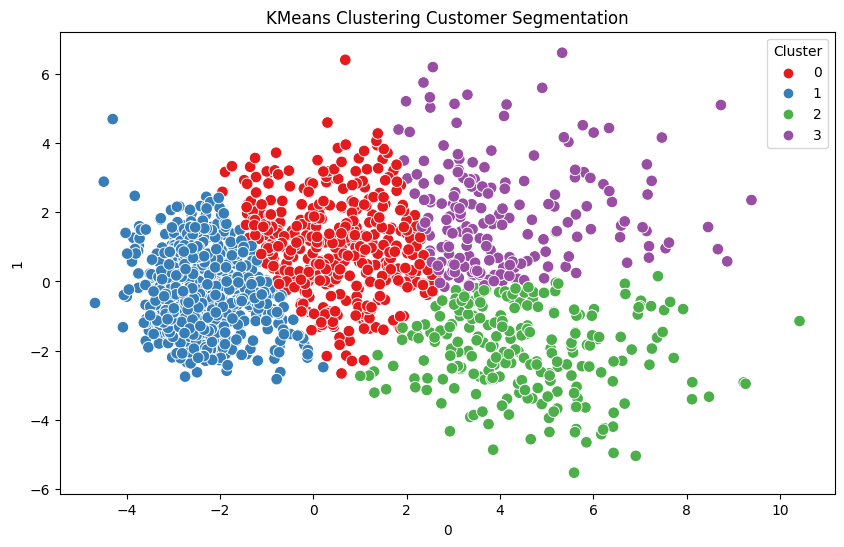

In [ ]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=0, y=1, data=df_pca, hue='cluster', palette='Set1', s=70)
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=123)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='BrBG')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering', fontsize=16, fontweight='bold')
    plt.show()

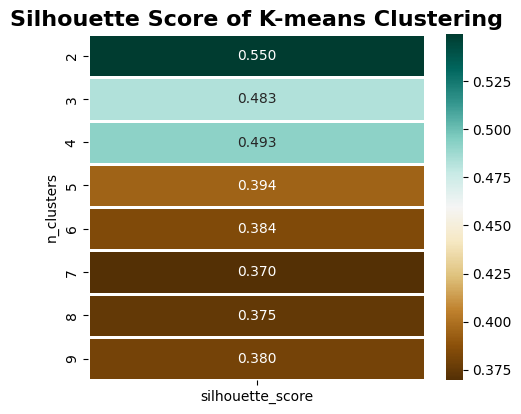

In [ ]:
# Mengonversi DataFrame ke numpy array
data_array = df_pca.to_numpy()

# Panggil fungsi visualize_silhouette_layer dengan data_array
visualize_silhouette_layer(data_array)

# Customer Personality Analysis for Marketing Retargeting

In [ ]:
df_pre['Cluster'] = kmeans.labels_

## Cluster Analytical Statistic

In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 1 to 2239
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1840 non-null   int64         
 1   ID                        1840 non-null   int64         
 2   Year_Birth                1840 non-null   int64         
 3   Education                 1840 non-null   object        
 4   Marital_Status            1840 non-null   object        
 5   Income                    1840 non-null   float64       
 6   Kidhome                   1840 non-null   int64         
 7   Teenhome                  1840 non-null   int64         
 8   Dt_Customer               1840 non-null   datetime64[ns]
 9   Recency                   1840 non-null   int64         
 10  MntCoke                   1840 non-null   int64         
 11  MntFruits                 1840 non-null   int64         
 12  MntMeatProducts     

In [ ]:
features = ['Recency','Total_Transaction','Total_Spending', 'Income','Conversion_Rate', 'Age', 'Cluster']
stats = df_pre[features]

In [ ]:
round(stats.groupby('Cluster').agg(['mean']),2).round()

,Recency,Total_Transaction,Total_Spending,Income,Conversion_Rate,Age
,mean,mean,mean,mean,mean,mean
Cluster,,,,,,
0,48.0,18.0,425867.0,52857438.0,3.0,58.0
1,49.0,7.0,65308.0,33063385.0,1.0,51.0
2,47.0,20.0,1001405.0,70331247.0,9.0,55.0
3,49.0,24.0,1112685.0,66503343.0,5.0,59.0


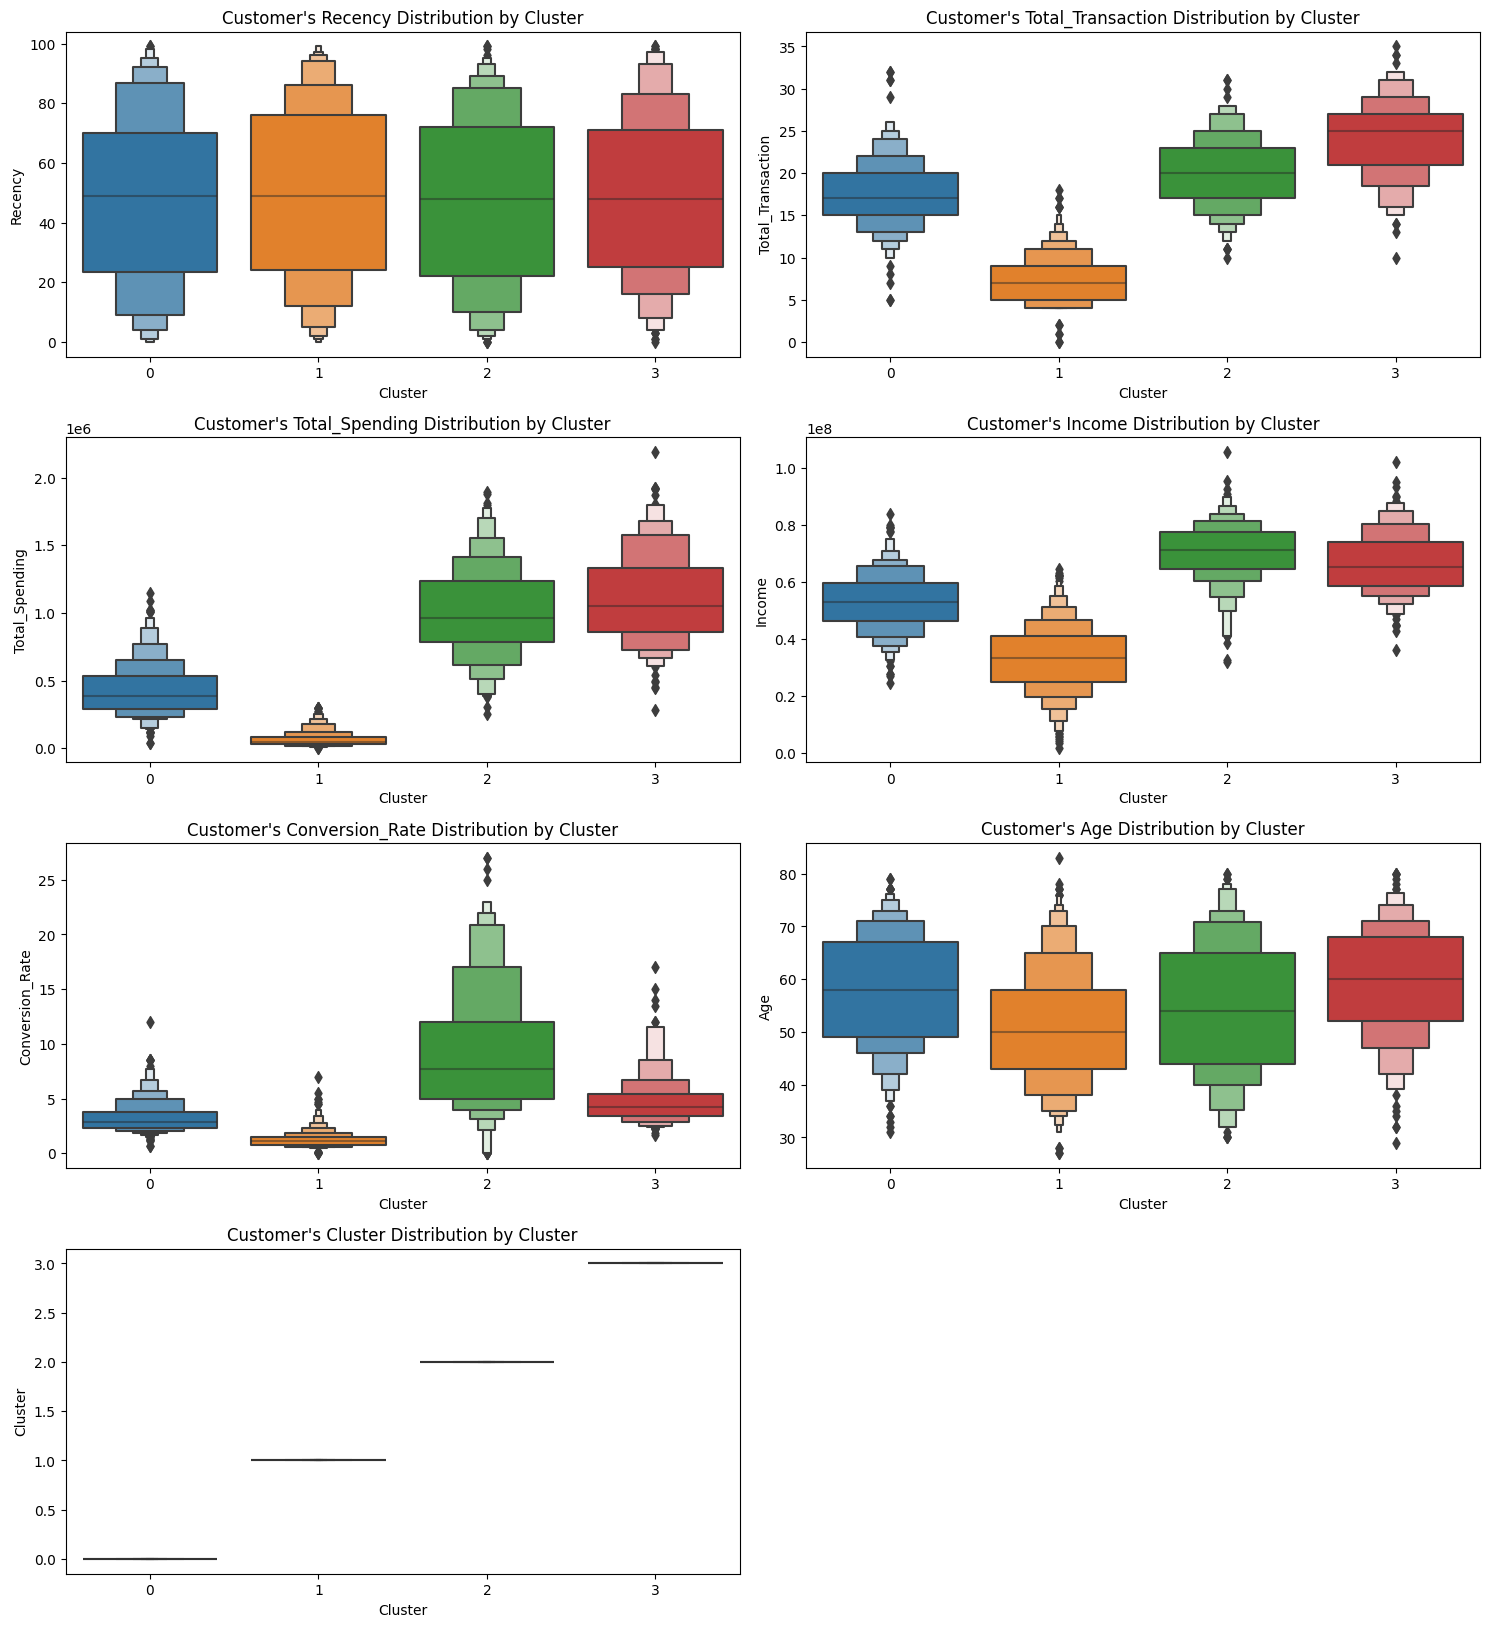

In [ ]:
# distribusi cluster
plt.figure(figsize=(15, 20))
for i in range(0, len(features)):
    plt.subplot(5, 2, i+1)
    sns.boxenplot(x='Cluster', y=df_pre[features[i]], data=df_pre).set(title=f'Customer\'s {features[i]} Distribution by Cluster')
    plt.tight_layout()

Berdasarkan hasil analisis clustering, ditemukan karakteristik masing-masing segmen cluster sebagai berikut: <br>

**Cluster 0:** **Low Spender Customer** <br>
- Rata-rata melakukan 18 transaksi dengan pengeluaran bulanan sekitar Rp 425.867.
- Pendapatan rata-rata pada segmen ini tergolong cukup tinggi, yakni sekitar Rp 52.857.438 per tahun.
- Tingkat konversi pada segmen ini adalah sedang, sekitar 3%.
- Mayoritas berada di umur 50 th - 60 th an.

**Cluster 1: Very Low Spender Customer** <br>
- Rata-rata hanya melakukan 7 transaksi dengan pengeluaran bulanan sekitar Rp 65.308.
- Pendapatan rata-rata pada segmen ini tergolong terendah, yakni sekitar Rp 33.063.385 per tahun.
- Tingkat konversi pada segmen ini adalah yang terendah, hanya sekitar 1%.
- Mayoritas berada di umur 40 th - 50 th an.

**Cluster 2: Mid Spender Customer** <br>
- Rata-rata melakukan sekitar 20 transaksi dengan pengeluaran bulanan mencapai Rp 1.001.405.
- Pendapatan rata-rata pada segmen ini adalah yang tertinggi, yakni sekitar Rp 70.331.247 per tahun.
- Tingkat konversi pada segmen ini adalah yang tertinggi, sekitar 9%.
- Mayotitas berada di umur 40 th - 60 th an.

**Cluster 3: High Spender Customer** <br>
- Rata-rata melakukan sekitar 24 transaksi dengan pengeluaran bulanan mencapai Rp 1.112.685.
- Pendapatan rata-rata pada segmen ini tergolong cukup tinggi, yakni sekitar Rp 66.503.343 per tahun.
- Tingkat konversi pada segmen ini adalah cukup sedang, sekitar 5%.
- Mayoritas berada di umur 50 th - 60 th an.

## Percentage of Each Cluster

In [ ]:
df_prc = df_pre.copy()

In [ ]:
df_prc['Customer_Class'] = np.where(df_prc['Cluster'] == 0, 'Low Spender',
                                   np.where(df_prc['Cluster'] == 1, 'Very Low Spender',
                                            np.where(df_prc['Cluster'] == 2, 'Mid Spender', 'High Spender')))

In [ ]:
df_prc.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Age,Age_Categories,Total_Children,Total_Transaction,Total_Spending,Total_Accepted_Campaigns,Conversion_Rate,education_encd,Cluster,Customer_Class
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,...,69,Old Adult,2,6,21000,0,1.20,2,1,Very Low Spender
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,58,Middle-Aged Adult,0,21,734000,0,5.25,2,2,Mid Spender
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,...,39,Young Adult,1,8,48000,0,1.33,2,1,Very Low Spender
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,42,Middle-Aged Adult,1,19,407000,0,3.80,4,0,Low Spender
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,2013-09-09,16,...,56,Middle-Aged Adult,1,22,702000,0,3.67,3,0,Low Spender


In [ ]:
prc_vis = df_prc.groupby('Customer_Class').size().reset_index()
prc_vis.columns = ['Customer Class','Total']
prc_vis['%'] = round(prc_vis['Total']*100/sum(prc_vis['Total']),2)
prc_vis.sort_values(by='Total', ascending=False)
prc_vis

,Customer Class,Total,%
0,High Spender,213,11.58
1,Low Spender,443,24.08
2,Mid Spender,259,14.08
3,Very Low Spender,925,50.27


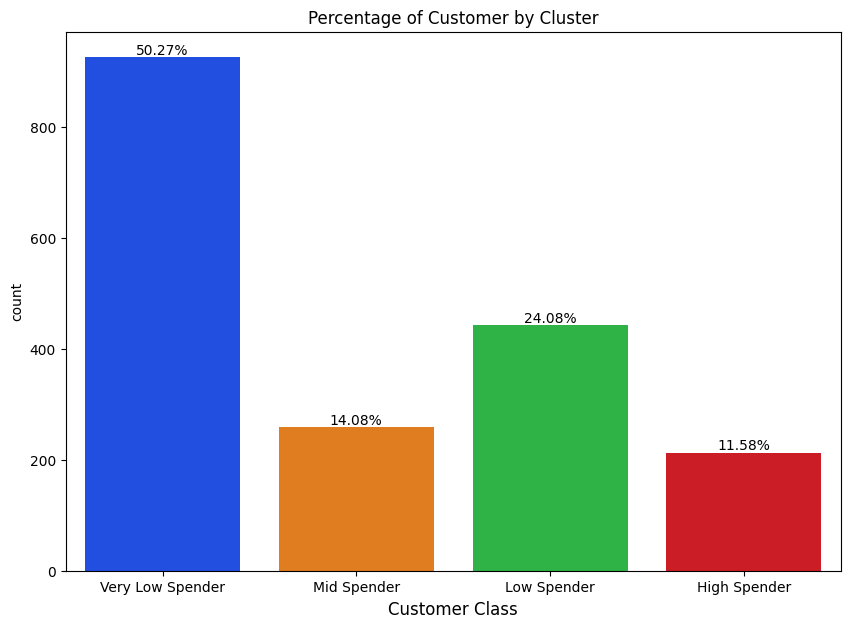

In [ ]:
# Create the countplot
plt.figure(figsize=(10, 7))
fig = sns.countplot(data=df_prc, x='Customer_Class', palette='bright')

# Calculate and add percentages on top of the bars
total = len(df_prc)
ax = fig.axes
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            f'{height/total:.2%}',
            ha="center")

plt.title('Percentage of Customer by Cluster', fontsize=12)
plt.xlabel('Customer Class', fontsize=12)

plt.show()

## Customer Analysis on Web Visit and Purchasing History

### Web Visit and Purchasing History

In [ ]:
var = ['NumWebVisitsMonth', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Customer_Class']
df_var = df_prc[var]

In [ ]:
var_group = round(df_var.groupby('Customer_Class').agg(['mean']),2).round()
var_group.reset_index(inplace=True)

In [ ]:
var_group.columns =  ['Customer Class', 'Web Visits Month', 'Deals Purchases', 'Web Purchases', 'Catalog Purchases', 'Store Purchases']
var_group

,Customer Class,Web Visits Month,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases
0,High Spender,6.0,3.0,7.0,5.0,9.0
1,Low Spender,6.0,4.0,6.0,2.0,6.0
2,Mid Spender,3.0,1.0,5.0,5.0,9.0
3,Very Low Spender,7.0,2.0,2.0,0.0,3.0


### Accepted Campaign

In [ ]:
df_camp = df_prc.groupby(['Customer_Class']).agg({'Total_Accepted_Campaigns' : ['sum']}).reset_index()
df_camp.columns = ['Customer Class', 'Total Accepted Campaigns']
df_camp = df_camp.sort_values(by=['Total Accepted Campaigns'])
df_camp

,Customer Class,Total Accepted Campaigns
3,Very Low Spender,60
2,Mid Spender,72
1,Low Spender,90
0,High Spender,202


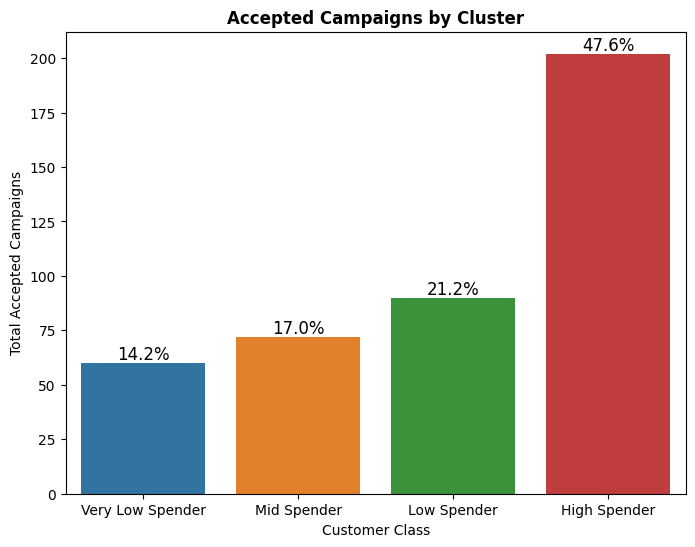

In [ ]:
# Membuat barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Customer Class', y='Total Accepted Campaigns', data=df_camp)

# Menghitung total kampanye
total_campaigns = df_camp['Total Accepted Campaigns'].sum()

# Menambahkan persentase di atas barplot
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_campaigns) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 6), textcoords='offset points')

# Judul
ax.set_title('Accepted Campaigns by Cluster', color='black',
             fontsize=12, fontweight='bold')

plt.show()

### Distribution Plot

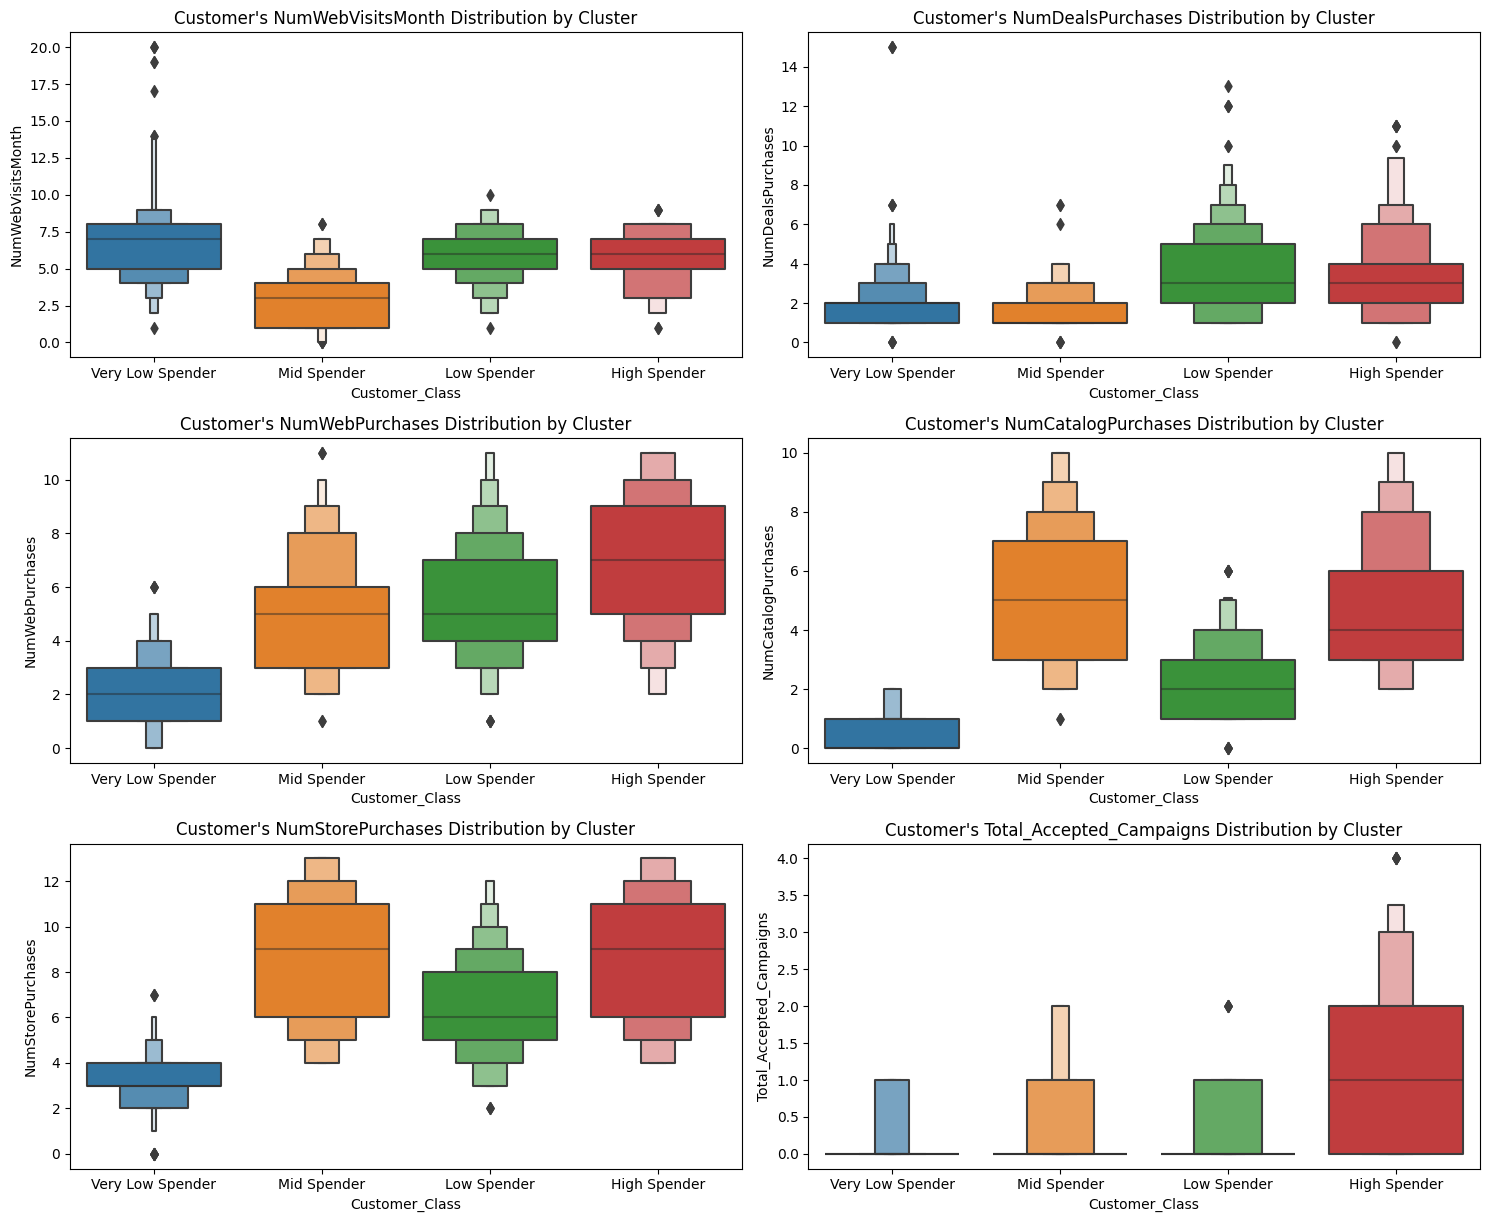

In [ ]:
# var
var2 = ['NumWebVisitsMonth', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Accepted_Campaigns']
# distribusi cluster
plt.figure(figsize=(15, 20))
for i in range(0, len(var2)):
    plt.subplot(5, 2, i+1)
    sns.boxenplot(x='Customer_Class', y=df_prc[var2[i]], data=df_prc).set(title=f'Customer\'s {var2[i]} Distribution by Cluster')
    plt.tight_layout()

**Insights:** <br>

**Cluster Very Low Spender:** <br>

- Tingkat kunjungan ke situs web perusahaan paling tinggi dibandingkan dengan cluster lain.
- Respons terhadap kampanye yang disajikan masih rendah.
- Memiliki jumlah populasi terbanyak.
- Diperlukan strategi untuk meningkatkan keterlibatan dan respons terhadap kampanye.

**Cluster Low Spender:** <br>
- Tingkat kunjungan web cukup tinggi.
- Sering berbelanja di platform website dan toko fisik.
- Aktif menggunakan kupon penawaran dan promo.
- Respons kampanye masih dapat ditingkatkan.
- Rekomendasi: Customisasi kampanye sesuai preferensi kebutuhan dan keinginan cluster.

**Cluster Mid Spender:** <br>
- Mayoritas pelanggan jarang mengunjungi situs web perusahaan.
- Tetapi sering berbelanja di semua platform.
- Respons kampanye tidak terlalu tinggi.
- Jarang menggunakan promo.
- Rekomendasi: Optimalkan saluran komunikasi lain seperti email, media sosial, atau platform online lainnya untuk efektif menjangkau kelompok ini.

**Cluster High Spender:** <br>
- Paling responsif terhadap kampanye.
- Sering berbelanja di semua platform.
- Tingkat kunjungan web cukup tinggi.
- Cukup aktif menggunakan promo.
- Rekomendasi: Tingkatkan interaksi dengan kampanye yang lebih menarik dan relevan.






## Customer Analysis Based on Total Spending per Product

In [ ]:
spend_product = round(df_prc.groupby('Customer_Class')['MntCoke', 'MntMeatProducts', 'MntFishProducts','MntGoldProds',
                                                 'MntSweetProducts', 'MntFruits'].mean().reset_index(),2)
spend_product

,Customer_Class,MntCoke,MntMeatProducts,MntFishProducts,MntGoldProds,MntSweetProducts,MntFruits
0,High Spender,811281.69,211323.94,38211.27,67971.83,23136.15,28732.39
1,Low Spender,297483.07,85756.21,18266.37,46762.98,11790.07,12571.11
2,Mid Spender,500810.81,304139.00,95737.45,75505.79,39409.27,61308.88
3,Very Low Spender,30830.27,19222.70,6235.68,13427.03,4548.11,4471.35


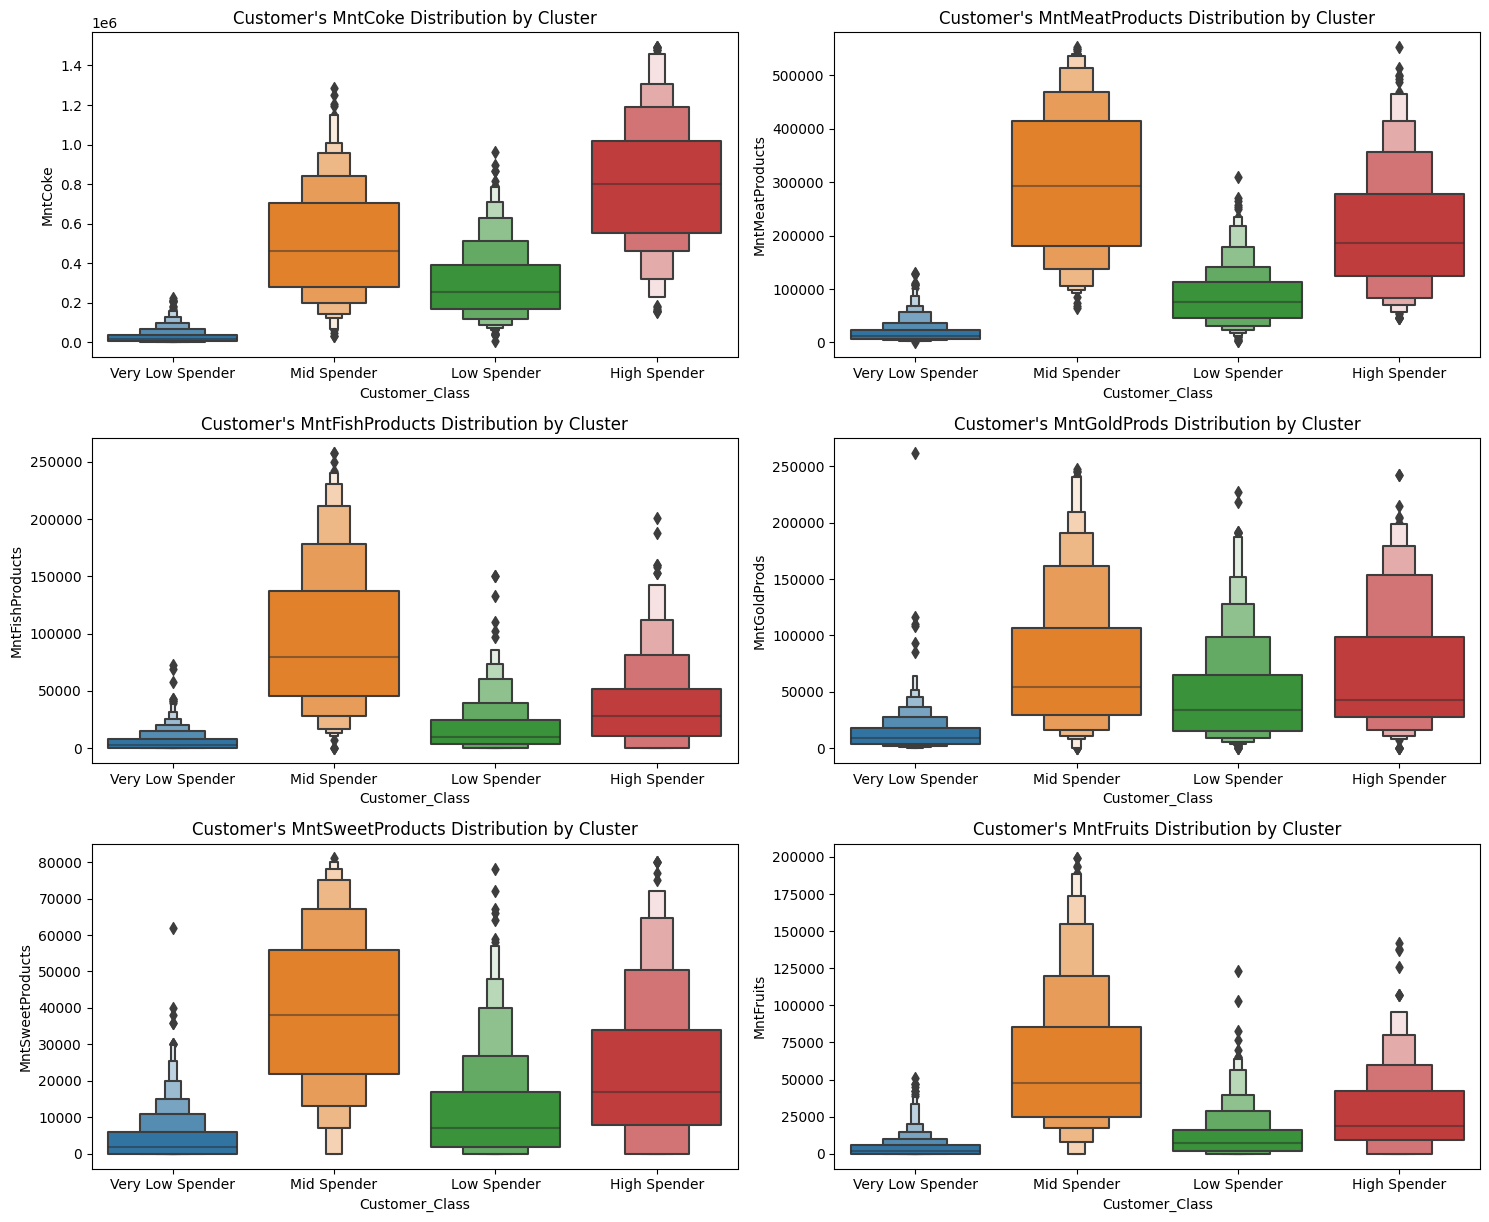

In [ ]:
# var
var3 = ['MntCoke', 'MntMeatProducts', 'MntFishProducts','MntGoldProds', 'MntSweetProducts', 'MntFruits']
# distribusi cluster
plt.figure(figsize=(15, 20))
for i in range(0, len(var3)):
    plt.subplot(5, 2, i+1)
    sns.boxenplot(x='Customer_Class', y=df_prc[var3[i]], data=df_prc).set(title=f'Customer\'s {var3[i]} Distribution by Cluster')
    plt.tight_layout()

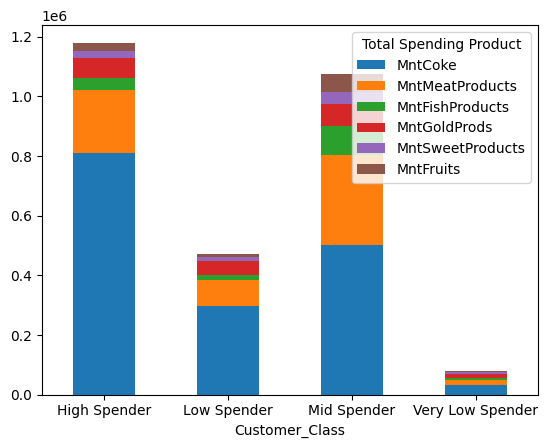

In [ ]:
spend_product.plot(x='Customer_Class', kind='bar', stacked=True)
plt.xticks(rotation=360)
plt.legend(title='Total Spending Product', loc='upper right')

**Insights:** <br>
- Pelanggan di semua cluster mengeluarkan uang paling banyak untuk produk Coke dan Meat, sedangkan produk Sweet dan Fruits paling sedikit.<br>

Berikut urutan produk favorit tiap cluster:
1. High Spender = coke, meat, gold, fish, fruits, sweet
2. Mid Spender = coke, meat, fish, gold, fruits, sweet
3. Low Spender = coke, meat, gold, fish, fruits, sweet
4. Very Low Spender = coke, meat, gold, fish, fruits, sweet

# Business Recommendation

**Very Low Spender:** <br>
- Populasi terbanyak, yaitu 50.24 %
-	Memiliki total spending dan income terendah, namun tingkat kunjungan website tertinggi.
-	Respons terhadap campaign yang disajikan masih rendah.
-	Conversion rate terendah, hanya sekitar 1%.
-	Mayoritas berada di umur 40 th - 50 th an.
-	Urutan produk favorit: coke, meat, gold, fish, fruits, sweet
<br>

Rekomendasi:<br>
-	Pelanggan dari kelompok ini sering mengunjungi website, jadi perusahaan bisa menyesuaikan konten dan tawaran diskon khusus sesuai dengan minat mereka.
-	Perusahaan dapat mengingatkan pelanggan di kelompok ini tentang produk atau layanan yang mereka lihat di website dengan iklan yang disesuaikan, sehingga mereka lebih mungkin untuk melanjutkan pembelian.
-	Karena konversi rendah dan respons kurang baik, perusahaan perlu fokus pada konten yang memberikan informasi dan solusi yang bermanfaat kepada pelanggan, sehingga meningkatkan keterlibatan dan kepercayaan mereka.<br>
<br>

**Low Spender:**<br>
-	Populasi 24.08 %
-	Tingkat kunjungan web cukup tinggi.
-	Sering berbelanja di platform website dan toko fisik.
-	Aktif menggunakan kupon penawaran dan promo.
-	Respons terhadap campaign tidak terlalu tinggi.
-	Conversion rate sedang, sekitar 3%.
-	Mayoritas berada di umur 50 th - 60 th an.
-	Urutan produk favorit: coke, meat, gold, fish, fruits, sweet
<br>

Rekomendasi:<br>
-	Customisasi campaign sesuai preferensi kebutuhan dan keinginan cluster.
-	Karena cluster ini aktif menggunakan promo, kita dapat menawarkan cashback atau voucher diskon untuk transaksi berikutnya jika mereka mencapai batas pembelian tertentu.
-	Bundling Produk: Buat bundel produk dengan harga khusus. Ini dapat mendorong mereka untuk membeli lebih banyak item dalam satu transaksi.<br>
<br>

**Mid Spender:**
-	Populasi 14.08 %
-	Memiliki income tertinggi
-	Tingkat kunjungan website terendah, namun sering berbelanja di semua platform (web, catalog, store)
-	Jarang menggunakan promo.
-	Respons terhadap campaign tidak terlalu tinggi.
-	Conversion rate tertinggi, sekitar 9%.
-	Mayotitas berada di umur 40 th - 60 th an
-	Urutan produk favorit: coke, meat, fish, gold, fruits, sweet
<br>

Rekomendasi:<br>
-	Karena kelompok ini kurang aktif di website, perusahaan dapat menggunakan email, pesan teks, atau media sosial sebagai cara komunikasi alternatif untuk campaign. Ini membantu meningkatkan interaksi dan kesadaran pelanggan.
-	Pastikan pengalaman pengguna yang baik di website dan saat berinteraksi dengan produk atau layanan perusahaan.
-	Tawarkan mereka untuk bergabung dengan program loyalitas yang memberikan poin atau hadiah spesial untuk setiap transaksi.<br>
<br>

**High Spender:**<br>
-	Populasi terendah, yaitu 11.58 %.
-	Memiliki total spending tertinggi dan sering berbelanja di semua platform (web, catalog, store)
-	Tingkat kunjungan web cukup tinggi
-	Paling responsif terhadap campaign
-	Cukup aktif menggunakan promo
-	Conversion rate sedang, sekitar 5%.
-	Mayoritas berada di umur 50 th - 60 th an.
-	Urutan produk favorit: coke, meat, gold, fish, fruits, sweet
<br>

Rekomendasi:<br>
-	Tingkatkan interaksi dengan campaign yang lebih menarik dan relevan.
-	Menawarkan diskon dan program loyalitas yang memberikan poin atau hadiah spesial untuk setiap transaksi, hal ini dapat menjaga minat pelanggan agar terus berbelanja.
-	Tawarkan layanan pelanggan premium seperti pengiriman ekspres atau akses awal ke penawaran eksklusif.



